In [1]:
from numpy import genfromtxt

# Enable interactive rotation of graph
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder


In [2]:
df=pd.read_csv("dataset/PCA_Material.csv")
df=df.drop("Unnamed: 0",axis=1)
df=df.set_index("Material")
dic=df.to_dict('index')
dic

{'CI': {'n': 1878},
 'COPPER': {'n': 4},
 'DI': {'n': 394},
 'PVC': {'n': 7},
 'SAND': {'n': 363},
 'SPUN': {'n': 844}}

In [3]:
X = [['CI', 1878], ['COPPER', 4], ['DI', 394], ['PVC', 7],['SAND', 363],['SPUN', 844]]

In [4]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

enc.transform(X).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [5]:
from sklearn.base import TransformerMixin

class OneHot(TransformerMixin):
    def __init__(self,col):
        self.col = col
        self.oh = OneHotEncoder()
    
    def fit(self,x,y=None):
        self.oh.fit(x[[self.col]])
        return self
    
    def transform(self,x):
        ones = self.oh.transform(x[[self.col]])
        ones = pd.DataFrame(ones.toarray(),columns = self.oh.get_feature_names(),index = x.index)
        return pd.concat((x.drop(columns = [self.col]),ones),axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import explained_variance_score

In [7]:
df= df=pd.read_csv("dataset/all_water_mains_with_breaksinfo.csv")
df

,Unnamed: 0,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,break_date,season,...,Y,time_at_scene,time_on,time_off,TotalHoursWaterOff,street_dir,street_name,street_type,StreetSegmentID,num_bldgs_off
0,0,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23876,23876,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23877,23877,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23878,23878,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23879,23879,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
train,test = train_test_split(df,stratify = df["Material"],train_size = 0.5)

In [9]:
oh = OneHot("Material")
data = oh.fit_transform(train[["Unnamed: 0","Material"]])

In [10]:
data

,Unnamed: 0,x0_CI,x0_CIPP,x0_COPPER,x0_DI,x0_HDPE,x0_None,x0_PVC,x0_SAND,x0_SPUN
9393,9393,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3867,3867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9270,9270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22701,22701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1150,1150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19804,19804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1345,1345,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3223,3223,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2196,2196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data=data.drop(["Unnamed: 0","x0_CIPP","x0_HDPE","x0_None"],axis=1)


In [12]:
data

,x0_CI,x0_COPPER,x0_DI,x0_PVC,x0_SAND,x0_SPUN
9393,0.0,0.0,1.0,0.0,0.0,0.0
3867,0.0,0.0,1.0,0.0,0.0,0.0
9270,1.0,0.0,0.0,0.0,0.0,0.0
22701,0.0,0.0,1.0,0.0,0.0,0.0
1150,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
19804,0.0,0.0,1.0,0.0,0.0,0.0
1345,0.0,0.0,1.0,0.0,0.0,0.0
3223,0.0,0.0,1.0,0.0,0.0,0.0
2196,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X=data.to_numpy()
X=X.T
rows, cols = np.array(X.shape)
print('Rows of X = ',rows)
print('Cols of X = ',cols)
# Subtract mean
X_m = X - np.mean(X, 1).reshape((6,1))
#x_m, y_m, z_m = X_m
print(X)

Rows of X =  6
Cols of X =  11940
[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = U[:,0]

In [15]:
a

array([-0.45334713, -0.00941066,  0.85875466, -0.01230057, -0.1866736 ,
       -0.1480875 ])

In [16]:
test=pd.DataFrame(U.T,columns=["CI","COPPER" ,"DI","PVC","SAND","SPUN"],index=[1,2,3,4,5,6])
test

,CI,COPPER,DI,PVC,SAND,SPUN
1,-0.453347,-0.009411,0.858755,-0.012301,-0.186674,-0.148087
2,0.735640,-0.009764,0.211845,-0.012901,-0.560805,-0.314945
3,-0.122232,0.004792,-0.065770,0.006384,-0.619358,0.772700
4,0.396804,-0.289264,0.368497,-0.494317,0.427510,0.442683
5,-0.094841,0.674129,-0.091461,-0.713146,-0.098234,-0.099816
6,0.268180,0.679463,0.263024,0.496704,0.273188,0.275467


<IPython.core.display.Javascript object>


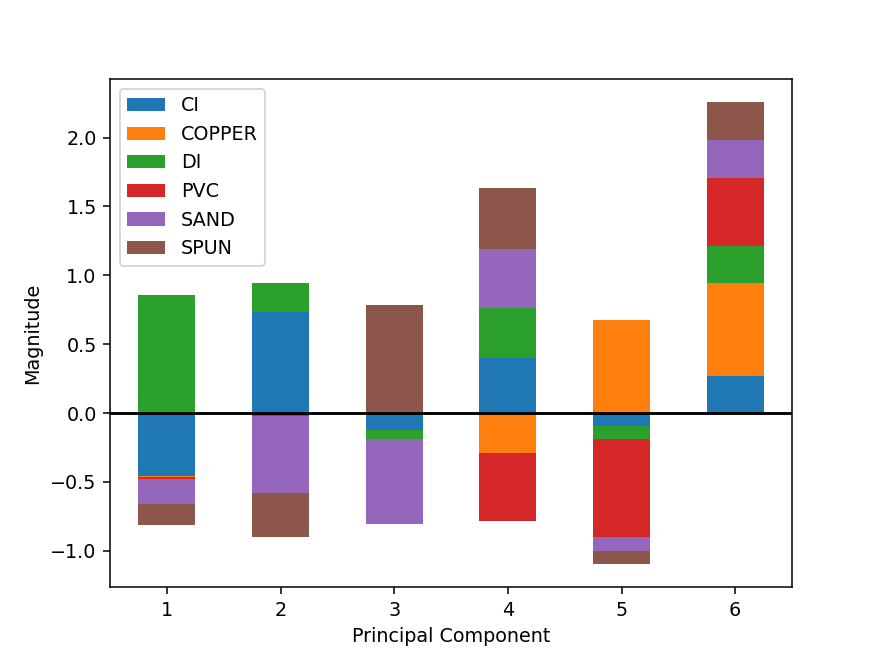

In [25]:
ax = test.plot.bar(rot=0,stacked=True)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Magnitude')
ax.set_axis_on()
ax.axhline(0,c="black")
plt.savefig('mat.pdf',format='pdf')

In [18]:
hi

NameError: name 'hi' is not defined

In [ ]:
s

In [ ]:
my_data = genfromtxt('dataset/PCA_Xv2.csv', delimiter=',')
X=my_data[1:,1:].T
# Subtract mean
X_m = X - np.mean(X, 1).reshape((3,1))
x_m, y_m, z_m = X_m
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=True)

# complete the next line of code to assign the first principal component to a
a = U[:,0]
a1= U[:,1]

In [ ]:
a

In [ ]:
s

In [ ]:
# display zero mean scatter plot and first principal component

fig = plt.figure(figsize=(7.5,3.75))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('Mean Lifetime')
ax.set_ylabel('Mean Month')
ax.set_zlabel('Mean Material PCA')
ax.set_title("Prinicipal Component Analysis")

ax.plot([0,80 *a[0]],[0,80*a[1]],[0,80*a[2]], c='b',label='Principal Component')
ax.plot([0,80 *a1[0]],[0,80*a1[1]],[0,80*a1[2]], c='b',label='Principal Component')

x1, y1, z1 = 1000*a
x2, y2, z2 = 1000*a1

ux, uy, uz = u = [x1-0, y1-0, z1-0]
vx, vy, vz = v = [x2-0, y2-0, z2-0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array([0,0,0])
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(1), range(1))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
ax.plot_surface(xx, yy, z)

ax.legend(loc='upper right')

bx = fig.add_subplot(122)
#bx.yscale("log")
bx.bar([1,2,3],s)
fig.tight_layout(pad=5.0)
fig.show()

In [ ]:
fig = plt.figure(figsize=(7.5,3.75))
ax = fig.add_subplot(121, projection='3d')
x1, y1, z1 = U[:,0]
x2, y2, z2 = U[:,1]

ux, uy, uz = u = [x1-0, y1-0, z1-0]
vx, vy, vz = v = [x2-0, y2-0, z2-0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array([0,0,0])
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
ax.plot_surface(xx, yy, z)
plt.show()

In [ ]:
#plt.savefig('pca.pdf',format='pdf')

In [ ]:
# display zero mean scatter plot and first principal component

fig,ax = plt.subplots()

plt.plot([0,50*a[0]],[0,50*a[1]],label='Principal Component')
plt.scatter(x_m, y_m, c=z_m, marker='x', label='Data',s=10)

plt.scatter(0,0, c=0, marker='.', label='Origin')

ax.set_xlabel('$Mean Lifetime$')
ax.set_ylabel('$Mean Month$')


ax.legend()
plt.colorbar()
plt.show()